# DSC640
# Aditya Sumbaraju
# Exercise 2.2 - tree maps, area charts, stacked area charts, and step charts 

In [30]:
# load all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [31]:
# Load the expenditures.txt into the dataframe
expenditures = pd.read_csv('C:\BU\DSC640\ex2-2\expenditures.txt', sep = '\t', header=0)
expenditures

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


# Tree Map

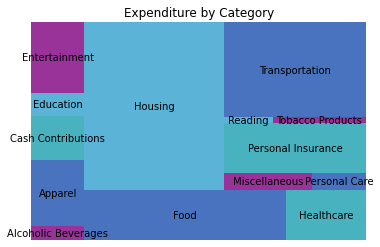

In [32]:


# Calculate total expenditure for categories
expenditures_cat = expenditures.groupby(['category'])['expenditure'].sum().reset_index()
color=['purple','#1C51B0','#1C9FB0','#32A0CE']
squarify.plot(sizes=expenditures_cat['expenditure'], label=expenditures_cat['category'], color=color,alpha=.8 )
plt.title('Expenditure by Category')
plt.axis('off')
plt.show()

# Area Chart

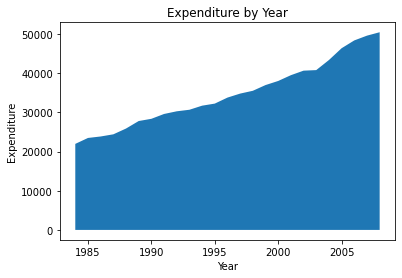

In [37]:
# Calculate total expenditure by year
expenditures_year = expenditures.groupby(['year'])['expenditure'].sum().reset_index()

# Area Chart
plt.fill_between(expenditures_year['year'], expenditures_year['expenditure'])
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure by Year')
plt.show()

# Stacked Area Chart

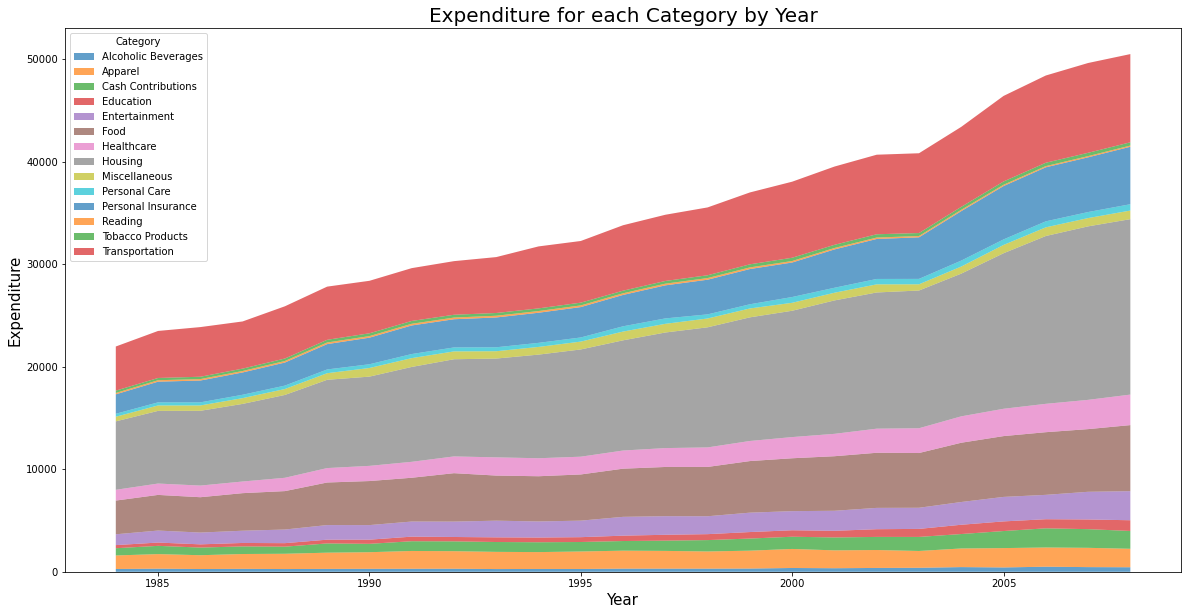

In [36]:
# Stack the dataset based on category of expenditure
exp_by_category = expenditures.loc[:, expenditures.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
exp_by_category .reset_index(level=0, inplace=True)
labs = exp_by_category.columns[1:].values.tolist()

#exp_by_category 
plt.figure(figsize=(20,10))
plt.stackplot(exp_by_category['year'], 
              exp_by_category['Alcoholic Beverages'], 
              exp_by_category['Apparel'], 
              exp_by_category['Cash Contributions'],
              exp_by_category['Education'],
              exp_by_category['Entertainment'],
              exp_by_category['Food'],
              exp_by_category['Healthcare'],
              exp_by_category['Housing'],
              exp_by_category['Miscellaneous'],
              exp_by_category['Personal Care'],
              exp_by_category['Personal Insurance'],
              exp_by_category['Reading'],
              exp_by_category['Tobacco Products'],
              exp_by_category['Transportation'],
              labels=labs, alpha=0.7)
plt.title('Expenditure for each Category by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Expenditure', fontsize=15)
plt.legend(title='Category', fontsize=10, ncol=1, loc = 'upper left')

# Line Chart

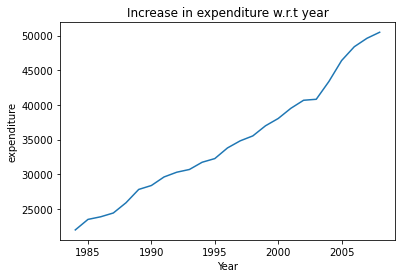

In [27]:
# Line Chart
expenditures = pd.read_csv('C:\BU\DSC640\ex2-2\expenditures.txt', sep = '\t', header=0)
expenditures.drop('category', axis=1, inplace=True)
expenditures.drop('sex', axis=1, inplace=True)

expenditures1=expenditures.groupby(['year'])['expenditure'].sum().reset_index()
plt.plot(expenditures1.year, expenditures1.expenditure)
plt.title('Increase in expenditure w.r.t year')
plt.xlabel('Year')
plt.ylabel('expenditure')
plt.show()

# Step Chart

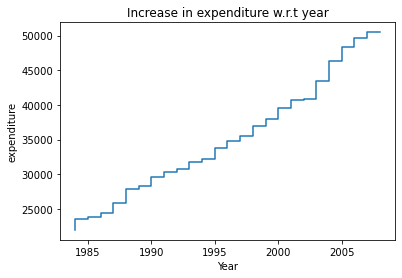

In [28]:
# STEP Chart
plt.step(expenditures1.year, expenditures1.expenditure)
plt.title('Increase in expenditure w.r.t year')
plt.xlabel('Year')
plt.ylabel('expenditure')
plt.show()
